# ROC AUC

- __ROC__ (Receiving Operating Characteristic)
- __AUC__ (Area Under Curve)
- Plot __True Positive rate__ vs __False Positive rate__ for various threshold (0-1)
- Evaluasi model & mengetahui threshold terbaik.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
x = np.arange(1, 11)
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
df = pd.DataFrame({
    'x': x, 'y': y
})
df.head()

,x,y
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


<hr>

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [16]:
model.fit(df[['x']], df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
model.predict_proba(df[['x']])
# [ proba nilai = 0 , proba nilai = 1 ]

array([[0.99521278, 0.00478722],
       [0.98449561, 0.01550439],
       [0.95096786, 0.04903214],
       [0.85557365, 0.14442635],
       [0.64405337, 0.35594663],
       [0.35594659, 0.64405341],
       [0.14442632, 0.85557368],
       [0.04903213, 0.95096787],
       [0.01550439, 0.98449561],
       [0.00478721, 0.99521279]])

In [18]:
df['proba'] = model.predict_proba(df[['x']])[:, 1]
df

,x,y,proba
0,1,0,0.004787
1,2,0,0.015504
2,3,0,0.049032
3,4,0,0.144426
4,5,0,0.355947
5,6,1,0.644053
6,7,1,0.855574
7,8,1,0.950968
8,9,1,0.984496
9,10,1,0.995213


In [19]:
model.predict(df[['x']])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
# Memprediksi dengan threshold range = 0.1 - 0.9
# y"0.1 = y prediksi dengan threshold = 0.1

# df['y"0.1'] = df['proba'].apply(lambda x: 1 if (x > 0.1) else 0)
# df['y"0.2'] = df['proba'].apply(lambda x: 1 if (x > 0.2) else 0)
# df['y"0.3'] = df['proba'].apply(lambda x: 1 if (x > 0.3) else 0)
# df['y"0.4'] = df['proba'].apply(lambda x: 1 if (x > 0.4) else 0)
# df['y"0.5'] = df['proba'].apply(lambda x: 1 if (x > 0.5) else 0)
# df['y"0.6'] = df['proba'].apply(lambda x: 1 if (x > 0.6) else 0)
# df['y"0.7'] = df['proba'].apply(lambda x: 1 if (x > 0.7) else 0)
# df['y"0.8'] = df['proba'].apply(lambda x: 1 if (x > 0.8) else 0)
# df['y"0.9'] = df['proba'].apply(lambda x: 1 if (x > 0.9) else 0)

# loop
for i in range(1, 10):
  df[f'y"{i/10}'] = df['proba'].apply(lambda x: 1 if (x > (i/10)) else 0)

df

,x,y,proba,"y""0.1","y""0.2","y""0.3","y""0.4","y""0.5","y""0.6","y""0.7","y""0.8","y""0.9"
0,1,0,0.004787,0,0,0,0,0,0,0,0,0
1,2,0,0.015504,0,0,0,0,0,0,0,0,0
2,3,0,0.049032,0,0,0,0,0,0,0,0,0
3,4,0,0.144426,1,0,0,0,0,0,0,0,0
4,5,0,0.355947,1,1,1,0,0,0,0,0,0
5,6,1,0.644053,1,1,1,1,1,1,0,0,0
6,7,1,0.855574,1,1,1,1,1,1,1,1,0
7,8,1,0.950968,1,1,1,1,1,1,1,1,1
8,9,1,0.984496,1,1,1,1,1,1,1,1,1
9,10,1,0.995213,1,1,1,1,1,1,1,1,1


<hr>

### 1. Manual Calculation

#### ROC Curve

- Graphical plot __False Positive Rate__ vs __True Positive Rate__ for each predictions.

In [25]:
from sklearn.metrics import confusion_matrix

In [30]:
# confusion matrix y & y"0.1
tn, fp, fn, tp = confusion_matrix(df['y'], df['y"0.1']).reshape(-1,)
tn, fp, fn, tp

(3, 2, 0, 5)

In [31]:
# fp rate = fp / total aktual 0 = fp / (fp + tn) = 1 - tn rate (recall-)
# tp rate = tp / total aktual 1 = tp / (tp + fn) = recall+

fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fpr, tpr

(0.4, 1.0)

In [33]:
# FP rate & TP rate untuk y & y"0.1 - y"0.9

roc = []
for i in range(1, 10):
    tn, fp, fn, tp = confusion_matrix(df['y'], df[f'y"{i/10}']).reshape(-1,)
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    roc.append([fpr, tpr])

roc = np.array(roc)
roc

array([[0.4, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 0.8],
       [0. , 0.8],
       [0. , 0.6]])

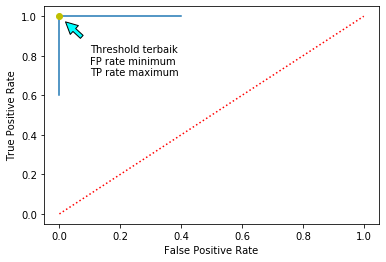

In [49]:
# plot ROC curve
plt.plot(roc[:, 0], roc[:, 1])
plt.plot(0, 1, 'yo')
plt.plot([0, 1], [0, 1], 'r:')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('Threshold terbaik\nFP rate minimum\nTP rate maximum', 
            xy=(0, 1), xytext=(.1, .7), arrowprops=dict(facecolor='cyan', shrink=.2)
            )
plt.show()

- Threshold terbaik = threshold di mana FP Rate-nya minimum & TP Rate-nya maximum.
- ROC curve di atas, FP Rate minimum, TP Rate maximum terbaik = titik (0,1)
- Ada 3 titik (0, 1), memiliki threshold masing" = 0.4, 0.5 & 0.6
- Threshold 0.4, 0.5 & 0.6 terbaik juga karena y prediksi == y aktual

<hr>

#### AUC (Area Under Curve)

- Luas area di bawah kurva ROC.
- Makin besar nilai AUC, model makin bagus.

<hr>

### 2. Using Sklearn

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

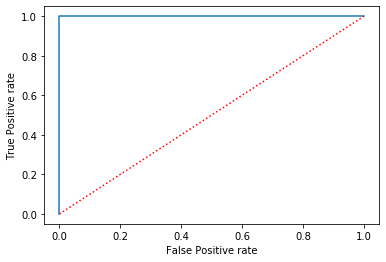

In [56]:
# plot ROC curve
# roc_curve(df['y'], df['proba'])
fpr, tpr, thres = roc_curve(df['y'], model.predict_proba(df[['x']])[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [57]:
# luas AUC
roc_auc_score(df['y'], model.predict(df[['x']]))

1.0